<a href="https://colab.research.google.com/github/navijose24/ML-Foundations-LearnLog/blob/main/House_Price_Prediction_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🏠 Problem Statement: House Price Prediction

**Question:**  
If we know some details about a house, can we predict its price?

### 🔹 Problem Definition
Given a house’s **size**, **number of bedrooms**, and **age**, we want to **predict the house price**.

### 🔹 Features (X) – Input Data
These are the details we already know about the house:
- **Size (in square feet)**
- **Number of bedrooms**
- **Age of the house (in years)**

### 🔹 Label (y) – Output Data
- **House Price** (in ₹ / $)

### 🔹 Why is this a Regression Problem?
Because the output (house price) is a **numerical value**, this problem comes under **Regression**.

### 🔹 Algorithm Used
- **Linear Regression**

Linear Regression learns the relationship between the input features and the house price by fitting a straight line that best represents the data.


In [10]:
#Data Input
import pandas as pd

# Creating a simple dataset
data = {
    "Size_sqft": [800, 900, 1000, 1100, 1200, 1300, 1500, 1800],
    "Bedrooms": [1, 2, 2, 2, 2, 3, 3, 3],
    "Age_years": [25, 20, 18, 15, 12, 10, 8, 5],
    "Price": [35, 45, 55, 60, 65, 70, 80, 95]
}

df = pd.DataFrame(data) #Converts your dictionary into a table-like structure.
df


,Size_sqft,Bedrooms,Age_years,Price
0,800,1,25,35
1,900,2,20,45
2,1000,2,18,55
3,1100,2,15,60
4,1200,2,12,65
5,1300,3,10,70
6,1500,3,8,80
7,1800,3,5,95


In [11]:
#Data Cleaning
print(df.isnull().sum()) #Checks if any value is missing (NaN).


Size_sqft    0
Bedrooms     0
Age_years    0
Price        0
dtype: int64


In [12]:
#Pre-processing
# Separate Features and Label
X = df[["Size_sqft", "Bedrooms", "Age_years"]]
y = df["Price"]

In [13]:
#optional Feature Scaling : all features comparable in size
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Scaling prevents one feature from dominating others.

In [14]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [15]:
#Model Training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [33]:
#Model Evaluation
model.score(X_test, y_test)
# Returns R² score, how well the model predicts unseen data.
# Value close to 1 → Excellent prediction.

0.8076923076923073

In [30]:
#Prediction
# New house details:
# Size = 1400 sqft, Bedrooms = 3, Age = 6 years
import pandas as pd

new_house = pd.DataFrame(
    [[14500, 13, 6]],
    columns=["Size_sqft", "Bedrooms", "Age_years"]
)

new_house_scaled = scaler.transform(new_house)
prediction = model.predict(new_house_scaled)

print("Predicted House Price(Lakhs):", prediction)


Predicted House Price(Lakhs): [730.]


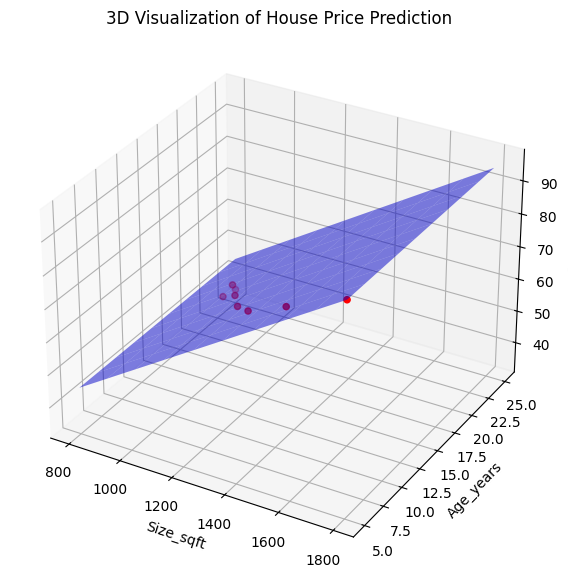

In [32]:
#Visualization for Multivariable Linear Regression
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Use only two features for easy 3D visualization
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(df['Size_sqft'], df['Age_years'], df['Price'], color='red', label='Actual Price')

# Create meshgrid for prediction plane
size_range = np.linspace(df['Size_sqft'].min(), df['Size_sqft'].max(), 10)
age_range = np.linspace(df['Age_years'].min(), df['Age_years'].max(), 10)
size_grid, age_grid = np.meshgrid(size_range, age_range)

# Predict price for meshgrid using model
grid = pd.DataFrame({
    'Size_sqft': size_grid.ravel(),
    'Bedrooms': np.full(size_grid.ravel().shape, 3),  # Fix Bedrooms=3 for visualization
    'Age_years': age_grid.ravel()
})
grid_scaled = scaler.transform(grid)
price_pred = model.predict(grid_scaled).reshape(size_grid.shape)

# Plot the plane
ax.plot_surface(size_grid, age_grid, price_pred, color='blue', alpha=0.5)

ax.set_xlabel('Size_sqft')
ax.set_ylabel('Age_years')
ax.set_zlabel('Price')
plt.title('3D Visualization of House Price Prediction')
plt.show()


## 🔥 Overfitting Example

Overfitting happens when a model learns training data too well but fails on new data.


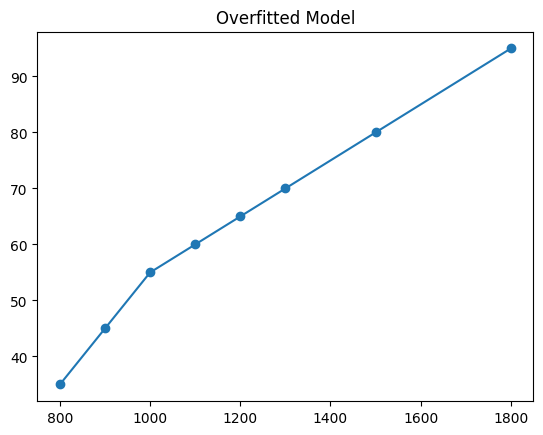

In [34]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model_overfit = LinearRegression()
model_overfit.fit(X_poly, y)

plt.scatter(X["Size_sqft"], y)
plt.plot(X["Size_sqft"], model_overfit.predict(X_poly))
plt.title("Overfitted Model")
plt.show()
